# AML Dataset : Devanshi Krishna Shah
 - Reference: https://www.kaggle.com/datasets/anshankul/ibm-amlsim-example-dataset
 - Source: https://github.com/IBM/AMLSim/wiki
 - Dataset variables descritpion: https://github.com/IBM/AMLSim/wiki/Data-Schema-for-Input-Parameters-and-Generated-Data-Set
 - Dataset in use: 1K vertices(accounts), 100K edges(transactions): https://github.com/IBM/AMLSim/wiki/Download-Example-Data-Set

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator
import matplotlib.ticker as mtick

## Data Exploration and Preprocessing
- There are 3 datasets mentioned here: alerts, transactions and accounts.
    - Accounts dataset: Contains the information about all the bank accounts whose transactions are monitored.
    - Alerts dataset: Contains the transactions which triggered an alert according to AML guidelines.
    - Transactions dataset: Contains the list of all the transactions with information about sender and receiver accounts.

In [2]:
accounts_df = pd.read_csv("./datasets/accounts.csv")
alerts_df = pd.read_csv("./datasets/alerts.csv")
txs_df = pd.read_csv("./datasets/transactions.csv")

### Accounts DataFrame

In [3]:
accounts_df.head()

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID
0,0,C_0,184.44,US,I,False,1
1,1,C_1,175.80,US,I,False,1
2,2,C_2,142.06,US,I,False,1
3,3,C_3,125.89,US,I,False,1
4,4,C_4,151.13,US,I,False,1


In [4]:
print("Number of unique accounts in this dataset:",len(accounts_df.index))

Number of unique accounts in this dataset: 1000


In [5]:
for col in accounts_df.columns[3:]:
    print("Unique values and their counts for column:",col)
    print(accounts_df[col].value_counts())
    print()

Unique values and their counts for column: COUNTRY
US    1000
Name: COUNTRY, dtype: int64

Unique values and their counts for column: ACCOUNT_TYPE
I    1000
Name: ACCOUNT_TYPE, dtype: int64

Unique values and their counts for column: IS_FRAUD
False    838
True     162
Name: IS_FRAUD, dtype: int64

Unique values and their counts for column: TX_BEHAVIOR_ID
1    200
2    200
3    200
4    200
5    200
Name: TX_BEHAVIOR_ID, dtype: int64



### Preprocessing:
- As observed the columns "COUNTRY", "ACCOUNT_TYPE" in categorical variables have the same information for all records and therefore aren't contributing valuable information. Thus can be removed
- The TX_BEHAVIOR_ID based on description provided from the dataset source, indicates the model of transactions that the given account follows from:
    - 0: Single
    - 1: Fan-out
    - 2: Fan-in
    - 3: Mutual
    - 4: Forward
    - 5: Periodical

In [6]:
accounts_df.drop(['COUNTRY','ACCOUNT_TYPE'],inplace=True,axis=1)

### Alerts DataFrame

In [7]:
alerts_df.head()

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
0,14,fan_in,True,1864,732,608,TRANSFER,2.88,4
1,14,fan_in,True,3521,813,608,TRANSFER,3.72,6
2,14,fan_in,True,4333,814,608,TRANSFER,3.66,8
3,11,fan_in,True,7876,488,889,TRANSFER,4.48,14
4,11,fan_in,True,9575,811,889,TRANSFER,3.95,16


In [8]:
print("Number of overall alerts witnessed for transactions tracked for these accounts:",len(alerts_df.index))

Number of overall alerts witnessed for transactions tracked for these accounts: 175


In [9]:
print("Unique values and their counts for column: ALERT_TYPE")
print(alerts_df['ALERT_TYPE'].value_counts())
print()
print("Unique values and their counts for column: IS_FRAUD")
print(alerts_df['IS_FRAUD'].value_counts())
print()
print("Unique values and their counts for column: TX_TYPE")
print(alerts_df['TX_TYPE'].value_counts())
print()

Unique values and their counts for column: ALERT_TYPE
cycle     96
fan_in    79
Name: ALERT_TYPE, dtype: int64

Unique values and their counts for column: IS_FRAUD
True    175
Name: IS_FRAUD, dtype: int64

Unique values and their counts for column: TX_TYPE
TRANSFER    175
Name: TX_TYPE, dtype: int64



### Preprocessing:
- As observed the column "TX_TYPE" in categorical variables has the same information for all records and therefore isn't contributing valuable information. Thus can be removed

In [10]:
alerts_df.drop(['TX_TYPE'],inplace=True,axis=1)

### Transactions DataFrame

In [11]:
txs_df.head()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,959,450,TRANSFER,406.85,0,False,-1
1,2,245,324,TRANSFER,469.41,0,False,-1
2,3,507,980,TRANSFER,17.25,0,False,-1
3,4,507,919,TRANSFER,17.25,0,False,-1
4,5,507,962,TRANSFER,17.25,0,False,-1


In [12]:
print("Number of transactions by the tracked accounts:",len(txs_df.index))

Number of transactions by the tracked accounts: 117533


In [13]:
print("Unique values and their counts for column: TX_TYPE")
print(txs_df['TX_TYPE'].value_counts())
print()
print("Unique values and their counts for column: IS_FRAUD")
print(txs_df['IS_FRAUD'].value_counts())
print()

Unique values and their counts for column: TX_TYPE
TRANSFER    117533
Name: TX_TYPE, dtype: int64

Unique values and their counts for column: IS_FRAUD
False    117358
True        175
Name: IS_FRAUD, dtype: int64



### Preprocessing:
- As observed the column "TX_TYPE" in categorical variables has the same information for all records and therefore isn't contributing valuable information. Thus can be removed

In [14]:
txs_df.drop(['TX_TYPE'],inplace=True,axis=1)

### Verifications to validate the dataset
- verifying SENDER_ACCOUNT_IDs for the transactions flagged as fraud are indeed from the accounts flagged as fraud

In [15]:
txs_set = set(txs_df[txs_df['IS_FRAUD'] == True]['SENDER_ACCOUNT_ID'])
accounts_set = set(accounts_df[accounts_df['IS_FRAUD']==True]['ACCOUNT_ID'])
if txs_set.issubset(accounts_set):
    print("All account_ids for txs flagged fraud in txs_set are in account_ids in accounts_set flagged fraud.")
else:
    print("Not all account_ids for txs flagged fraud in txs_set are in account_ids in accounts_set flagged fraud.")

All account_ids for txs flagged fraud in txs_set are in account_ids in accounts_set flagged fraud.


## Data Visualization

In [16]:
fraud_counts = accounts_df[accounts_df['IS_FRAUD'] == True]['IS_FRAUD'].count()
non_fraud_counts = accounts_df[accounts_df['IS_FRAUD'] == False]['IS_FRAUD'].count()
fraud_accounts = accounts_df[accounts_df['IS_FRAUD'] == True]
non_fraud_accounts = accounts_df[accounts_df['IS_FRAUD'] == False]

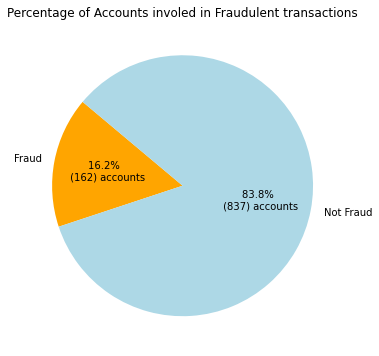

In [17]:
counts = [fraud_counts, non_fraud_counts]
labels = ['Fraud', 'Not Fraud']

total_accounts = fraud_counts + non_fraud_counts

plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
plt.pie(counts, labels=labels, autopct=lambda p: f'{p:.1f}% \n ({int(p * total_accounts / 100)}) accounts', startangle=140, colors=['orange','lightblue'])


plt.title('Percentage of Accounts involed in Fraudulent transactions')
plt.show()

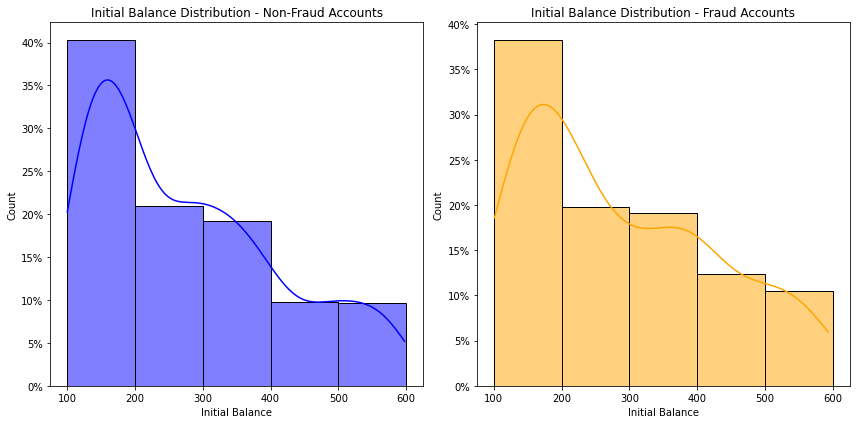

In [18]:
# Define the bin range for initial balances with 100s intervals
bin_range = range(100, 700, 100)

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Subplot 1: Non-Fraud Accounts (Histogram)
plt.subplot(1, 2, 1)
ax1 = sns.histplot(data=non_fraud_accounts, x='INIT_BALANCE', bins=bin_range, kde=True, color='blue',stat='percent')
#since the counts for both the plots share a very different range, normalizing it to percentage
plt.title('Initial Balance Distribution - Non-Fraud Accounts')
plt.xlabel('Initial Balance')
plt.ylabel('Count')
ax1.yaxis.set_major_locator(FixedLocator(ax1.get_yticks()))
ax1.set_yticklabels(['{:.0f}%'.format(x) for x in ax1.get_yticks()])

# Subplot 2: Fraud Accounts (Histogram)
plt.subplot(1, 2, 2)
ax2 = sns.histplot(data=fraud_accounts, x='INIT_BALANCE', bins=bin_range, kde=True,color='orange',stat='percent')
plt.title('Initial Balance Distribution - Fraud Accounts')
plt.xlabel('Initial Balance')
plt.ylabel('Count')
ax2.yaxis.set_major_locator(FixedLocator(ax2.get_yticks()))
ax2.set_yticklabels(['{:.0f}%'.format(x) for x in ax2.get_yticks()])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

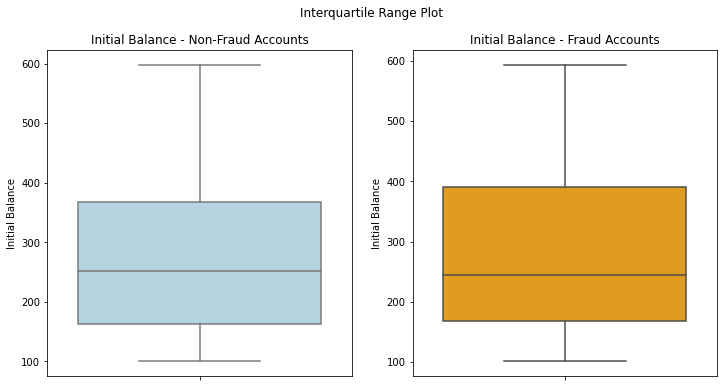

In [19]:
plt.figure(figsize=(12, 6))
plt.suptitle('Interquartile Range Plot')
plt.subplot(1, 2, 1)
sns.boxplot(data=non_fraud_accounts, y='INIT_BALANCE',color='lightblue')
plt.title('Initial Balance - Non-Fraud Accounts')
plt.ylabel('Initial Balance')
plt.subplot(1, 2, 2)
sns.boxplot(data=fraud_accounts, y='INIT_BALANCE',color='orange')
plt.title('Initial Balance - Fraud Accounts')
plt.ylabel('Initial Balance')
plt.show()

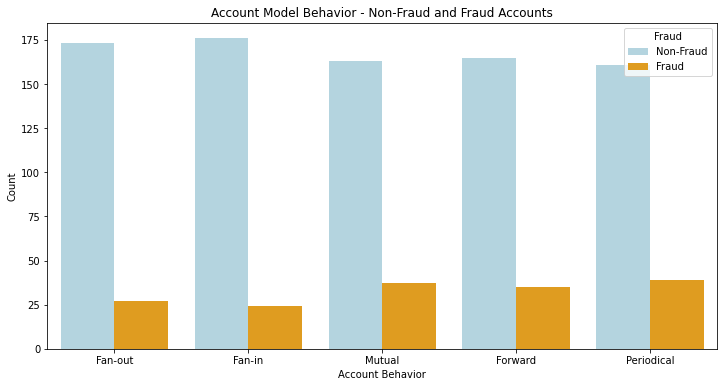

In [20]:
behavior_mapping = {1: 'Fan-out', 2: 'Fan-in', 3: 'Mutual', 4: 'Forward', 5: 'Periodical'}
# Combine non-fraud and fraud data into a single DataFrame
combined_data = pd.concat([non_fraud_accounts, fraud_accounts])

# Create a figure for the grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=combined_data, x='TX_BEHAVIOR_ID', hue='IS_FRAUD', palette=['lightblue', 'orange'])
ax.set_xticklabels([v for k, v in behavior_mapping.items()])

# Add labels and a legend
plt.title('Account Model Behavior - Non-Fraud and Fraud Accounts')
plt.xlabel('Account Behavior')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])

plt.show()

- Fan-in : multiple sender and single receiver account 
- Cycle: The main account m sends large amount of money to one of the neighbor members. The beneficiary account sends 90% of the received money to another neighbor. Finally, the last member sends money to the main account m
- As observed below since there are multiple senders in fan-in type transaction the amounts sent in one transaction are of small denominations compared to cycle

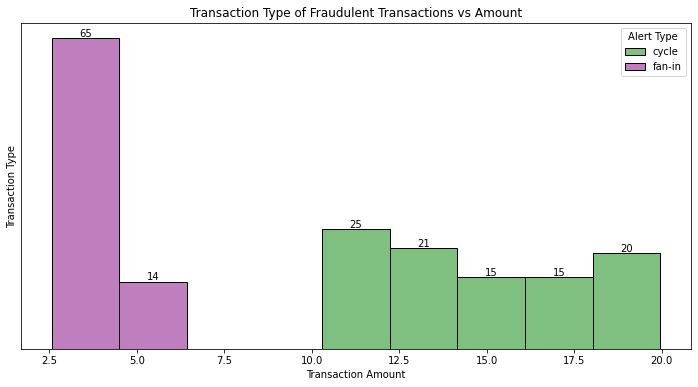

In [21]:
# Create a figure for the grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=alerts_df, x='TX_AMOUNT', hue='ALERT_TYPE', palette=['purple', 'green'])

# Add labels and a legend
plt.title('Transaction Type of Fraudulent Transactions vs Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Type')
plt.legend(title='Alert Type', labels=['cycle', 'fan-in'])

# Annotate the bars with count labels on the y-axis
for bar in ax.patches:
    if bar.get_height() > 0:
        ax.annotate(f'{bar.get_height():.0f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')
plt.yticks([])

plt.show()

In [22]:
fraudulent_count = len(txs_df[txs_df['IS_FRAUD'] == True])
non_fraudulent_count = len(txs_df[txs_df['IS_FRAUD'] == False])
fraudulent_transactions = txs_df[txs_df['IS_FRAUD'] == True]
non_fraudulent_transactions = txs_df[txs_df['IS_FRAUD'] == False]

- The transactions dataset is highly imbalanced with only 0.1% of transactions accounting for fraud

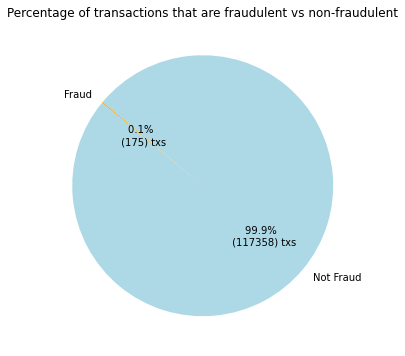

In [42]:
counts = [fraudulent_count, non_fraudulent_count]
labels = ['Fraud', 'Not Fraud']
total_accounts = fraudulent_count + non_fraudulent_count
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
plt.pie(counts, labels=labels, autopct=lambda p: f'{p:.1f}% \n ({int(p * total_accounts / 100)}) txs', startangle=140, colors=['orange','lightblue'])
plt.title('Percentage of transactions that are fraudulent vs non-fraudulent')
plt.show()

In [24]:
txs_df['TX_AMOUNT'].describe().apply(lambda x: '{:.2f}'.format(x))

count      117533.00
mean        21301.13
std        250443.10
min             0.00
25%            34.51
50%           168.13
75%           462.45
max      11475748.00
Name: TX_AMOUNT, dtype: object

- Both categories clearly have a very different transaction_amount distribution for this particular dataset. The values for one category (in this case, fraudulent transactions) are concentrated in a narrower range, while the other category (non-fraudulent transactions) has a wider distribution that includes both lower and much higher values
- Non fraudulent transactions have clear outliers towards the end as well
- These points are verified using Interquartile plots and Violin plots below

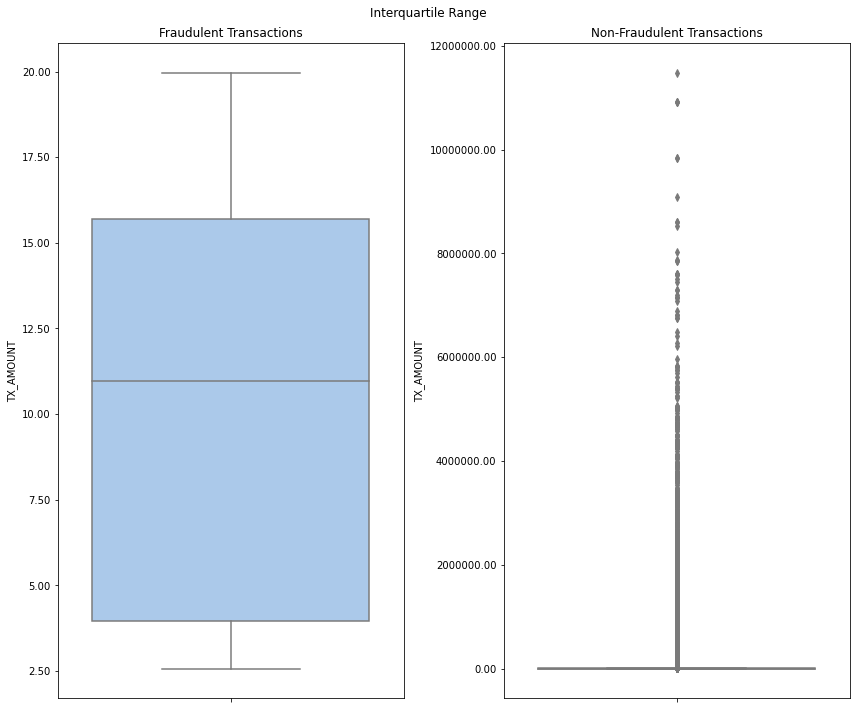

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
plt.suptitle('Interquartile Range')
# Set titles for the subplots
axes[0].set_title('Fraudulent Transactions')
axes[1].set_title('Non-Fraudulent Transactions')

# Customize the scale to 2 decimal places
for ax in axes:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(x)))

# Create box plots for IQR
sns.boxplot(data=fraudulent_transactions, y='TX_AMOUNT', ax=axes[0])
sns.boxplot(data=non_fraudulent_transactions, y='TX_AMOUNT', ax=axes[1])

plt.tight_layout()
plt.show()

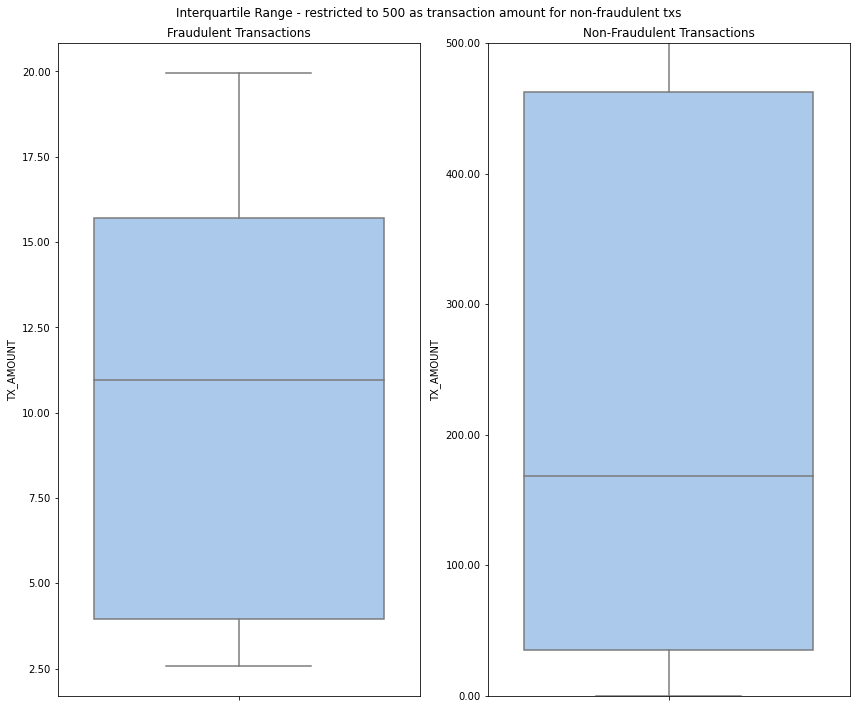

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
plt.suptitle('Interquartile Range - restricted to 500 as transaction amount for non-fraudulent txs')
# Set titles for the subplots
axes[0].set_title('Fraudulent Transactions')
axes[1].set_title('Non-Fraudulent Transactions')

# Customize the scale to 2 decimal places
for ax in axes:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(x)))


axes[1].set_ylim(0, 500)  # Adjust the y-axis limits as needed

# Create box plots for IQR
sns.boxplot(data=fraudulent_transactions, y='TX_AMOUNT', ax=axes[0])
sns.boxplot(data=non_fraudulent_transactions, y='TX_AMOUNT', ax=axes[1])

plt.tight_layout()
plt.show()

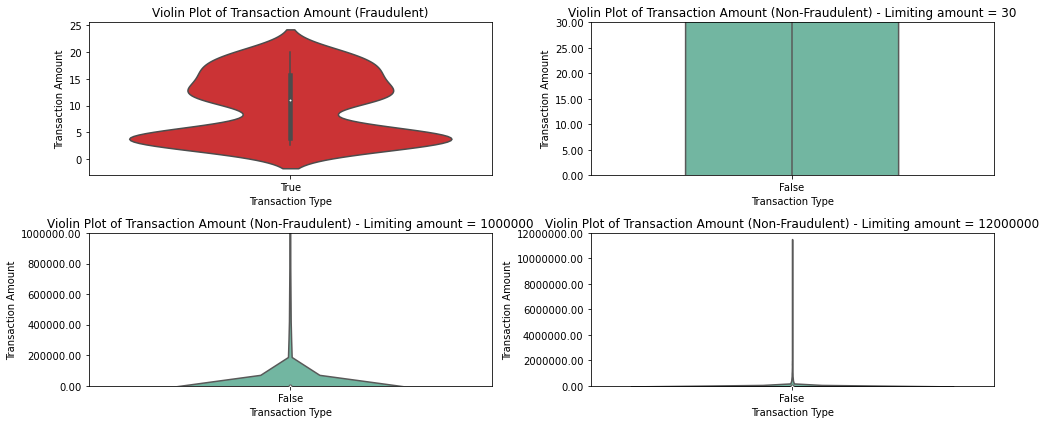

In [37]:
# Create two separate DataFrames for fraudulent and non-fraudulent transactions
fraudulent_txs = txs_df[txs_df['IS_FRAUD'] == True]
non_fraudulent_txs = txs_df[txs_df['IS_FRAUD'] == False]

# Create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

# Create the first subplot for fraudulent transactions
plt.subplot(2, 2, 1)
sns.violinplot(x="IS_FRAUD", y="TX_AMOUNT", data=fraudulent_txs, palette="Set1")
plt.title("Violin Plot of Transaction Amount (Fraudulent)")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")

# Create the second subplot for non-fraudulent transactions
plt.subplot(2, 2, 2)
sns.violinplot(x="IS_FRAUD", y="TX_AMOUNT", data=non_fraudulent_txs, palette="Set2")
plt.title("Violin Plot of Transaction Amount (Non-Fraudulent) - Limiting amount = 30")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.ylim(0, 30)  # Adjust the limits as needed
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))  # Format y-axis to two decimal places
plt.tight_layout()  # Ensures that the subplots don't overlap

# Create the third subplot for non-fraudulent transactions
plt.subplot(2, 2, 3)
sns.violinplot(x="IS_FRAUD", y="TX_AMOUNT", data=non_fraudulent_txs, palette="Set2")
plt.title("Violin Plot of Transaction Amount (Non-Fraudulent) - Limiting amount = 1000000")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.ylim(0, 1000000)  # Adjust the limits as needed
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))  # Format y-axis to two decimal places
plt.tight_layout()  # Ensures that the subplots don't overlap

# Create the fourth subplot for non-fraudulent transactions
plt.subplot(2, 2, 4)
sns.violinplot(x="IS_FRAUD", y="TX_AMOUNT", data=non_fraudulent_txs, palette="Set2")
plt.title("Violin Plot of Transaction Amount (Non-Fraudulent) - Limiting amount = 12000000")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.ylim(0, 12000000)  # Adjust the limits as needed
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))  # Format y-axis to two decimal places
plt.tight_layout()  # Ensures that the subplots don't overlap

plt.show()

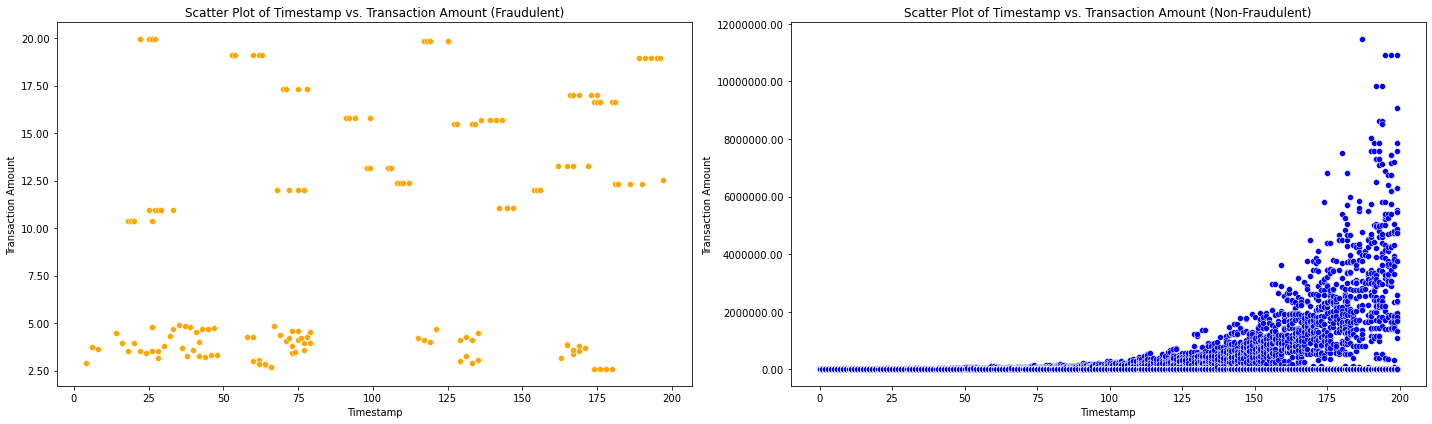

In [38]:
# Create a figure with two subplots side by side
plt.figure(figsize=(20, 6))

# Create the first subplot for fraudulent transactions
plt.subplot(1, 2, 1)
sns.scatterplot(data=fraudulent_transactions, x='TIMESTAMP', y='TX_AMOUNT', color='orange')
plt.title('Scatter Plot of Timestamp vs. Transaction Amount (Fraudulent)')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))  # Format y-axis to two decimal places

# Create the second subplot for non-fraudulent transactions
plt.subplot(1, 2, 2)
sns.scatterplot(data=non_fraudulent_transactions, x='TIMESTAMP', y='TX_AMOUNT', color='blue')
plt.title('Scatter Plot of Timestamp vs. Transaction Amount (Non-Fraudulent)')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))  # Format y-axis to two decimal places

plt.tight_layout()  # Ensures that the subplots don't overlap

plt.show()


Text(0, 0.5, 'Number of Transactions')

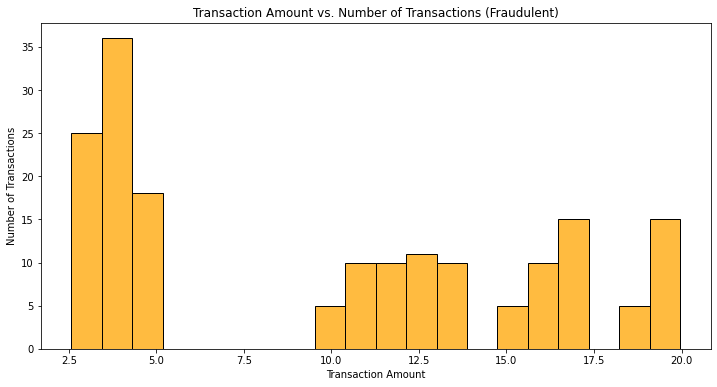

In [68]:
%matplotlib inline
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

sns.histplot(data=fraudulent_transactions, x='TX_AMOUNT', bins=20, color='orange')
plt.title('Transaction Amount vs. Number of Transactions (Fraudulent)')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

- The transactions in the last range of 6000001 to 12000000 are clearly extremely small in number compared to other ranges
- The next step would involve decisions to deal with these values and find out if we can treat them as outliers and remove them
- The next step must also involve dealing with accounts that have transaction amounts between 0 and 5

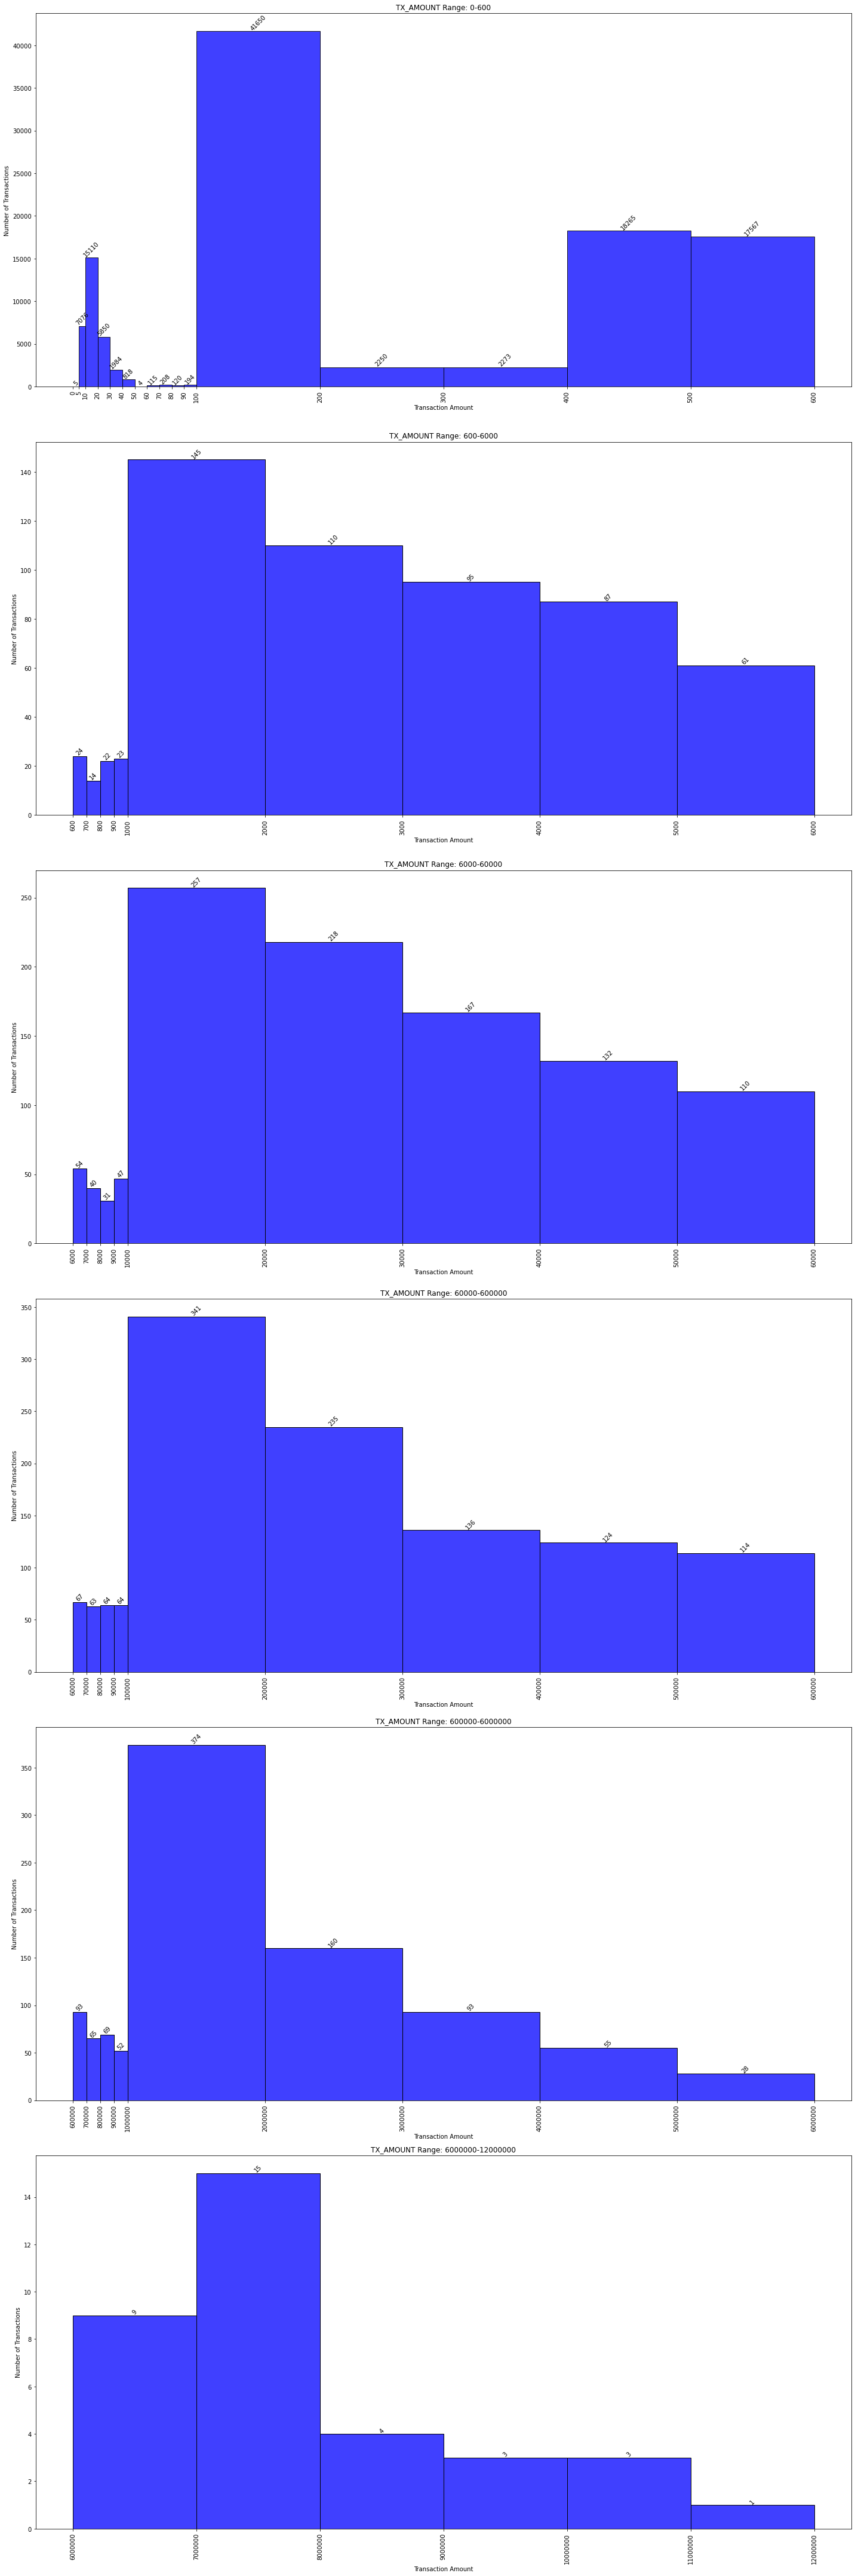

In [78]:
plt.figure(figsize=(20, 60))

# Non-fraudulent transactions with TX_AMOUNT less than or equal to 600
non_fraudulent_transactions_less_than_600 = non_fraudulent_transactions[non_fraudulent_transactions['TX_AMOUNT'] <= 600]

# Non-fraudulent transactions with TX_AMOUNT between 601 and 6000
non_fraudulent_transactions_601_6000 = non_fraudulent_transactions[
    (non_fraudulent_transactions['TX_AMOUNT'] > 600) & (non_fraudulent_transactions['TX_AMOUNT'] <= 6000)
]

# Non-fraudulent transactions with TX_AMOUNT between 6001 and 60000
non_fraudulent_transactions_6001_60000 = non_fraudulent_transactions[
    (non_fraudulent_transactions['TX_AMOUNT'] > 6000) & (non_fraudulent_transactions['TX_AMOUNT'] <= 60000)
]

# Non-fraudulent transactions with TX_AMOUNT between 60001 and 600000
non_fraudulent_transactions_60001_600000 = non_fraudulent_transactions[
    (non_fraudulent_transactions['TX_AMOUNT'] > 60000) & (non_fraudulent_transactions['TX_AMOUNT'] <= 600000)
]

# Non-fraudulent transactions with TX_AMOUNT between 600001 and 6000000
non_fraudulent_transactions_600001_6000000 = non_fraudulent_transactions[
    (non_fraudulent_transactions['TX_AMOUNT'] > 600000) & (non_fraudulent_transactions['TX_AMOUNT'] <= 6000000)
]

# Non-fraudulent transactions with TX_AMOUNT between 6000001 and 12000000
non_fraudulent_transactions_6000001_12000000 = non_fraudulent_transactions[
    (non_fraudulent_transactions['TX_AMOUNT'] > 6000000) & (non_fraudulent_transactions['TX_AMOUNT'] <= 12000000)
]

# Define the bin edges for each TX_AMOUNT range
bin_edges_600 = [0, 5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600]
bin_edges_6000 = [600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000]
bin_edges_60000 = [6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000]
bin_edges_600000 = [60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000]
bin_edges_6000000 = [600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000]
bin_edges_12000000 = [6000000, 7000000, 8000000, 9000000, 10000000, 11000000, 12000000]


# Plot histograms for each TX_AMOUNT range
bin_edges = [bin_edges_600, bin_edges_6000, bin_edges_60000, bin_edges_600000, bin_edges_6000000, bin_edges_12000000]

# Define the subsets and their corresponding bin edges
subset_data = [
    (non_fraudulent_transactions_less_than_600, bin_edges_600, '0-600'),
    (non_fraudulent_transactions_601_6000, bin_edges_6000, '600-6000'),
    (non_fraudulent_transactions_6001_60000, bin_edges_60000, '6000-60000'),
    (non_fraudulent_transactions_60001_600000, bin_edges_600000, '60000-600000'),
    (non_fraudulent_transactions_600001_6000000, bin_edges_6000000, '600000-6000000'),
    (non_fraudulent_transactions_6000001_12000000, bin_edges_12000000, '6000000-12000000')
]

for i, (data, bin_edges, title) in enumerate(subset_data):
    plt.subplot(6, 1, i+1)  # Specify the subplot position starting from 2 through 7
    ax = sns.histplot(data=data, x='TX_AMOUNT', bins=bin_edges, color='blue')
    # Annotate the bars with count labels on the y-axis
    for bar in ax.patches:
        if bar.get_height() > 0:
            ax.annotate(f'{bar.get_height():.0f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', rotation=45)
    plt.xlabel('Transaction Amount')
    plt.ylabel('Number of Transactions')
    plt.title(f'TX_AMOUNT Range: {title}')
    plt.xticks(ticks = bin_edges, labels = bin_edges, rotation = 90)
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))  # Format y-axis to two decimal places

plt.tight_layout()
plt.show()

### The dataframe below proves that: 
- All fraud transactions are from accounts flagged as fraud
- All accounts involved in any fraud transaction (1 or many transactions) are flagged as fraud
- All transactions involving an account flagged as fraud are not fraudulent

In [45]:
# List of ACCOUNT_ID values flagged as fraudulent
fraudulent_account_ids = accounts_df[accounts_df['IS_FRAUD'] == True]['ACCOUNT_ID'].tolist()

# Filter transactions where either SENDER_ACCOUNT_ID or RECEIVER_ACCOUNT_ID is in the list of fraudulent account IDs
transactions = txs_df[(txs_df['SENDER_ACCOUNT_ID'].isin(fraudulent_account_ids)) | (txs_df['RECEIVER_ACCOUNT_ID'].isin(fraudulent_account_ids))]

# Get the count of fraudulent transactions for each ACCOUNT_ID flagged as fraud
fraudulent_sender_transaction_counts = transactions[transactions['IS_FRAUD']==True]['SENDER_ACCOUNT_ID'].value_counts().reset_index()
fraudulent_sender_transaction_counts.columns = ['ACCOUNT_ID', 'FRAUDULENT_SENDER_COUNT']
fraudulent_receiver_transaction_counts = transactions[transactions['IS_FRAUD']==True]['RECEIVER_ACCOUNT_ID'].value_counts().reset_index()
fraudulent_receiver_transaction_counts.columns = ['ACCOUNT_ID', 'FRAUDULENT_RECEIVER_COUNT']

# Get the count of non fraudulent transactions for each ACCOUNT_ID flagged as fraud
non_fraudulent_sender_transaction_counts = transactions[transactions['IS_FRAUD']==False]['SENDER_ACCOUNT_ID'].value_counts().reset_index()
non_fraudulent_sender_transaction_counts.columns = ['ACCOUNT_ID', 'NON_FRAUDULENT_SENDER_COUNT']
non_fraudulent_receiver_transaction_counts = transactions[transactions['IS_FRAUD']==False]['RECEIVER_ACCOUNT_ID'].value_counts().reset_index()
non_fraudulent_receiver_transaction_counts.columns = ['ACCOUNT_ID', 'NON_FRAUDULENT_RECEIVER_COUNT']

# Merge fraudulent sender and receiver counts
fraudulent_transaction_counts = pd.merge(fraudulent_sender_transaction_counts, fraudulent_receiver_transaction_counts, on='ACCOUNT_ID', how='outer').fillna(0)

# Merge non-fraudulent sender and receiver counts
non_fraudulent_transaction_counts = pd.merge(non_fraudulent_sender_transaction_counts, non_fraudulent_receiver_transaction_counts, on='ACCOUNT_ID', how='outer').fillna(0)

# Now, merge fraudulent and non-fraudulent transaction counts
combined_transaction_counts = pd.merge(fraudulent_transaction_counts, non_fraudulent_transaction_counts, on='ACCOUNT_ID', how='outer').fillna(0)
combined_transaction_counts

,ACCOUNT_ID,FRAUDULENT_SENDER_COUNT,FRAUDULENT_RECEIVER_COUNT,NON_FRAUDULENT_SENDER_COUNT,NON_FRAUDULENT_RECEIVER_COUNT
0,999,4.0,4.0,70.0,941.0
1,996,4.0,6.0,51.0,523.0
2,997,3.0,7.0,104.0,678.0
3,956,3.0,2.0,180.0,150.0
4,919,3.0,1.0,308.0,502.0
...,...,...,...,...,...
844,647,0.0,0.0,0.0,1.0
845,499,0.0,0.0,0.0,1.0
846,255,0.0,0.0,0.0,1.0
847,242,0.0,0.0,0.0,1.0


- Since Account id: 647 as shown above is only associated with 1 non-frauduelent receiver transaction and no other transactions
- On investigating further, 647 is an account NOT flagged as fraud but as seen in the transaction below, Account id: 930 is flagged as fraud, however as also seen below although it involved a fraudulent account, the transaction is marked non fraudulent

In [46]:
transactions[(transactions['SENDER_ACCOUNT_ID'] == 647) | (transactions['RECEIVER_ACCOUNT_ID'] == 647)]

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
89475,89476,930,647,822340.81,152,False,-1
